In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Cicles

Donat un graf $G$, un __cicle__ és un conjunt de nodes de $G$ connectats per arestes formant una cadena tancada:
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/Undirected_6_cycle.svg" alt="Cicle" />

<div class="alert alert-success">
<h1>Detectar si tenim un cicle:</h1>

</div>

In [2]:
import networkx as nx
from matplotlib import pyplot as plt


# Observeu que ara el nostre DFS necessita un paràmetre extra: previous_node. 
# Aquest és el node amb el que cridem el DFS a la iteració següent.
def dfs_cycles(G, visited, current_node, previous_node):
    # Com sempre, visitem els nodes que no estiguin visitats
    if current_node not in visited:
        visited.add(current_node)

        # Per a cada veí del node actual comprovem si ja ha estat visitat
        for nei in G.neighbors(current_node):
            
            # En el cas que no, seguim explorant amb el DFS.
            # Observeu que al cridar la funció, aprofitem per comprovar si ja s'ha trobat un cicle.
            # En cas que sigui així, acabem.
            if nei not in visited:
                if dfs_cycles(G, visited, nei, current_node):
                    return True
            
            # Si el veí ja havia estat visitat, comprovem si es tracta d'un cicle.
            # Per fer-ho, s'ha de satisfer que el pare del node actual i el veí no coincideixin.
            # Si fóssin el mateix, vol dir que no es un cicle sino que es una aresta que estem
            # recorrent en ambdós sentits
            elif previous_node != nei:
                return True
    
    # Si no s'ha trobat cap cicle, es retornarà False.
    return False
        
        

def cycles(G):
    # Triem un node qualsevol (estem suposant que el graf té una sola component connexa)
    n = list(G.nodes())[0]
    
    # Inicialitzem un conjunt on guardem els nodes que ja han estat visitats.
    visited = set()
    
    return dfs_cycles(G, visited, n, None)

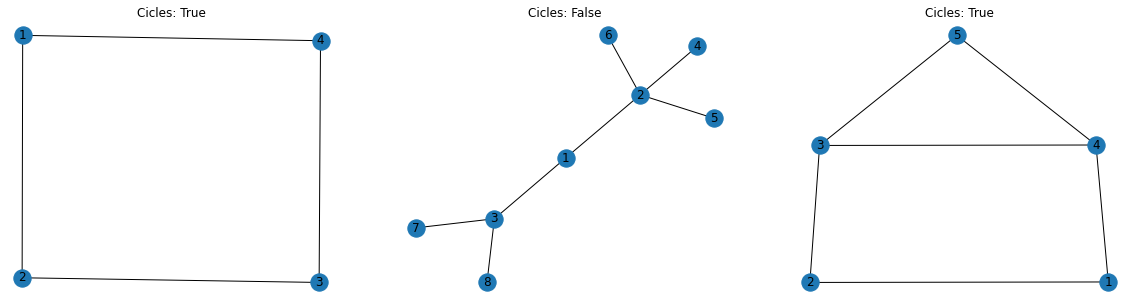

In [3]:
G1 = nx.Graph()
G1.add_edges_from(((1,2), (1,4), (2,1), (2,3), (4,3)))

G2 = nx.Graph()
G2.add_edges_from(((1,2), (1,3), (2,4), (2,5), (2,6), (3,7), (3,8)))

G3 = nx.Graph()
G3.add_edges_from(((1,2), (1,4), (2,1), (2,3), (4,3), (4,5), (3,5)))

fig, axs = plt.subplots(1,3,figsize=(20,5))
nx.draw(G1, with_labels=True, ax=axs[0])
axs[0].set_title(f'Cicles: {cycles(G1)}')

nx.draw(G2, with_labels=True, ax=axs[1])
axs[1].set_title(f'Cicles: {cycles(G2)}')

nx.draw(G3, with_labels=True, ax=axs[2])
axs[2].set_title(f'Cicles: {cycles(G3)}')

plt.show()

## Camí més curt entre totes les parelles de nodes

<div class="alert alert-success">
<h1> Floyd Warshall:</h1>
</div>


In [4]:
import numpy as np

def floyd_warshall(G):
    
    # Nombre total de nodes
    n = len(G.nodes())
    
    # Diccionaris de conversió. A cada node li assignem un nombre enter des de 0 fins a n-1
    id2index = {k: v for v, k in enumerate(G.nodes())}
    index2id = {v: k for v, k in enumerate(G.nodes())}
    
    # Inicialitzem una matriu de distàncies de valor infinit
    dist = np.zeros((n,n))+np.inf

    # Recorrem totes les arestes del graf. Modifiquem la matriu inicial amb els pesos de les arestes.
    for u,v,p in G.edges(data=True):
        dist[id2index[u],id2index[v]] = p['weight']

    # La diagonal de la matriu ha de ser zero
    for i in range(n):
        dist[i,i] = 0
    
    # Fins aquí hem inicialitzat la matriu. Ara apliquem la segona part de l'algorisme on hem d'anar modificant la matriu.
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # Si hem trobat un valor millor, l'actualitzem
                if(dist[i,j]>dist[i,k]+dist[k,j]):
                    dist[i,j] = dist[i,k]+dist[k,j]
                    
    return dist, id2index

El camí més curt entre 3 i 2 és 1.0


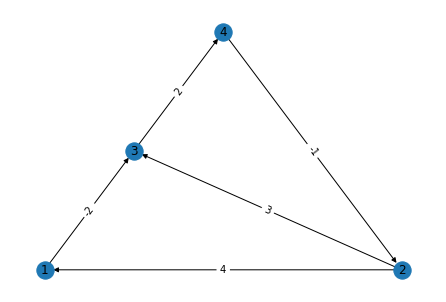

In [6]:
G = nx.DiGraph() 
G.add_weighted_edges_from([(1, 3, -2), (2, 1, 4),
                           (2, 3, 3),(4, 2, -1),(3, 4, 2)])


pos = nx.planar_layout(G)
nx.draw(G,pos,with_labels=True)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

dist, id2index = floyd_warshall(G)

n1, n2 = 3, 2
print(f"El camí més curt entre {n1} i {n2} és {dist[id2index[n1],id2index[n2]]}")